In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '1'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' #omit info 
from learnMSA.msa_hmm import Configuration, Align, Visualize
from learnMSA.msa_hmm.SequenceDataset import SequenceDataset
import numpy as np

2024-11-01 22:06:34.179081: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-01 22:06:34.189482: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-01 22:06:34.192623: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
I0000 00:00:1730498796.205696  109091 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730498796.235891  109091 cuda_executor.cc:1015] succ

## learnMSA demo

In this notebook, we will fit a number of HMM models to a dataset of unaligned sequences. 
We will then use the fitted models to align the sequences and compare the results.
Moreover, we will visualize the best (according to an objective criterion) model and alignment.

*This notebook is meant to be a demo for running learnMSA in Python code. Check the readme if you want to run learnMSA from the command line.* 

Change the variables in the following cell to fit your needs.

In [2]:
# Your fasta file with unaligned sequences.

train_filename = "test/data/egf.fasta"

# Reference file with aligned sequences that have matching IDs to (potentially a subset of) the 
# sequences in the train_file.
# Replace with empty string if no reference is available.
ref_filename = "test/data/egf.ref"

# The number of independently trained models.
num_models = 10

# Use sequence weights based on a rapid pre-clustering of the sequences (requires mmseqs2 to be installed)
use_weights = True

# Align long insertions with an external aligner left unaligned by the main MSA stage (requires famsa to be installed).
align_insertions = True

## Run learnMSA from Python (Training + Viterbi alignment)

Training of 10 models on file egf.fasta
Configuration: 
{
num_models : 10
transitioner : ProfileHMMTransitioner(
 transition_init=
    {
    begin_to_match : DefaultEntry() , match_to_end : DefaultExit() , 
    match_to_match : DefaultMatchTransition(1) , match_to_insert : DefaultMatchTransition(-1) , 
    insert_to_match : Norm(0, 0.1) , insert_to_insert : Norm(-0.5, 0.1) , 
    match_to_delete : DefaultMatchTransition(-1) , delete_to_match : Norm(0, 0.1) , 
    delete_to_delete : Norm(-0.5, 0.1) , left_flank_loop : Norm(0, 0.1) , 
    left_flank_exit : Norm(-1, 0.1) , right_flank_loop : Norm(0, 0.1) , 
    right_flank_exit : Norm(-1, 0.1) , unannotated_segment_loop : Norm(0, 0.1) , 
    unannotated_segment_exit : Norm(-1, 0.1) , end_to_unannotated_segment : Norm(-9, 0.1) , 
    end_to_right_flank : Norm(0, 0.1) , end_to_terminal : Norm(0, 0.1)
    },
 flank_init=Const(0.0),
 prior=ProfileHMMTransitionPrior(match_comp=1, insert_comp=1, delete_comp=1, alpha_flank=7000, alpha_single=100

I0000 00:00:1730498820.556119  109091 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730498820.556343  109091 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730498820.556516  109091 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730498820.556718  109091 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Epoch 1/10


I0000 00:00:1730498824.817574  109091 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730498824.817826  109091 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730498824.818005  109091 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730498824.818211  109091 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

34/34 - 34s - 989ms/step - loss: 96.7622 - loglik: -8.3538e+01 - prior: -1.3224e+01 - aux_loss: 0.0000e+00
Epoch 2/10
34/34 - 4s - 119ms/step - loss: 70.1706 - loglik: -6.7582e+01 - prior: -2.5885e+00 - aux_loss: 0.0000e+00
Epoch 3/10
34/34 - 4s - 108ms/step - loss: 68.4997 - loglik: -6.6499e+01 - prior: -2.0011e+00 - aux_loss: 0.0000e+00
Epoch 4/10
34/34 - 3s - 96ms/step - loss: 68.2433 - loglik: -6.6386e+01 - prior: -1.8573e+00 - aux_loss: 0.0000e+00
Epoch 5/10
34/34 - 4s - 122ms/step - loss: 68.0452 - loglik: -6.6229e+01 - prior: -1.8165e+00 - aux_loss: 0.0000e+00
Epoch 6/10
34/34 - 4s - 120ms/step - loss: 67.9072 - loglik: -6.6122e+01 - prior: -1.7851e+00 - aux_loss: 0.0000e+00
Epoch 7/10
34/34 - 4s - 118ms/step - loss: 67.9932 - loglik: -6.6240e+01 - prior: -1.7533e+00 - aux_loss: 0.0000e+00
Fitted model successfully.
Creating alignment model...
Successfully created alignment model.


I0000 00:00:1730498884.963785  109091 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730498884.964042  109091 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730498884.964224  109091 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730498884.964435  109091 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

expansions model 0: [(12, 4), (13, 2), (16, 1), (18, 2)]
discards model 0: []
expansions model 1: [(12, 2), (13, 2), (18, 2), (20, 2)]
discards model 1: []
expansions model 2: [(10, 1), (11, 2), (12, 3), (13, 1), (16, 1), (18, 2)]
discards model 2: []
expansions model 3: [(12, 2), (13, 3), (14, 1), (17, 2), (19, 2)]
discards model 3: []
expansions model 4: [(12, 4), (13, 2), (16, 1), (18, 2)]
discards model 4: []
expansions model 5: [(10, 1), (11, 2), (12, 2), (17, 1), (19, 2)]
discards model 5: []
expansions model 6: [(12, 2), (13, 3), (14, 1), (17, 1), (19, 2)]
discards model 6: []
expansions model 7: [(12, 2), (13, 2), (15, 1), (18, 1)]
discards model 7: []
expansions model 8: [(10, 1), (13, 3), (14, 1), (17, 2), (19, 2)]
discards model 8: []
expansions model 9: [(12, 2), (13, 3), (16, 1), (17, 1)]
discards model 9: []
Re-initialized the encoder parameters.
Fitting models of lengths [33, 34, 34, 35, 33, 33, 34, 33, 34, 33] on 7774 sequences.
Batch size= 256 Learning rate= 0.1
Using 

I0000 00:00:1730498891.989890  109091 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730498891.990157  109091 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730498891.990342  109091 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730498891.990556  109091 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Epoch 1/10


I0000 00:00:1730498895.250848  109091 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730498895.251103  109091 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730498895.251285  109091 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730498895.251496  109091 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

34/34 - 33s - 973ms/step - loss: 77.0245 - loglik: -6.3821e+01 - prior: -1.3203e+01 - aux_loss: 0.0000e+00
Epoch 2/10
34/34 - 4s - 113ms/step - loss: 65.3893 - loglik: -6.3134e+01 - prior: -2.2550e+00 - aux_loss: 0.0000e+00
Epoch 3/10
34/34 - 4s - 119ms/step - loss: 64.7642 - loglik: -6.3371e+01 - prior: -1.3931e+00 - aux_loss: 0.0000e+00
Epoch 4/10
34/34 - 4s - 117ms/step - loss: 64.5362 - loglik: -6.3346e+01 - prior: -1.1903e+00 - aux_loss: 0.0000e+00
Epoch 5/10
34/34 - 4s - 113ms/step - loss: 64.3238 - loglik: -6.3232e+01 - prior: -1.0913e+00 - aux_loss: 0.0000e+00
Epoch 6/10
34/34 - 4s - 116ms/step - loss: 64.3662 - loglik: -6.3354e+01 - prior: -1.0118e+00 - aux_loss: 0.0000e+00
Fitted model successfully.
Creating alignment model...
Successfully created alignment model.
Time for alignment: 134.1781
Likelihoods:  ['-59.1364', '-59.0796', '-59.1346', '-59.1256', '-59.0456', '-59.1532', '-59.0362', '-59.0088', '-59.0679', '-59.2077']
Mean likelihood:  -59.09955122594143
Selection crit

I0000 00:00:1730498952.910606  109091 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730498952.910851  109091 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730498952.911038  109091 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730498952.911268  109091 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Aligning 2 insertion slices with famsa.


/home/beckerf/mambaforge/envs/learnMSAdev2/lib/python3.12/site-packages/Bio/SeqRecord.py:228: BiopythonDeprecationWarning: Using a string as the sequence is deprecated and will raise a TypeError in future. It has been converted to a Seq object.
  warnings.warn(


time for generating output: 3.2311
Wrote file test/data/interactive.alignment.fasta
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 137ms/step
>l=-54.70_t=0.01
..........$C.D.......P......N............P........CYN.HGT..C-......SL....-RA...T......................G......YTCSCL....PR......Y....T....GEH$.......................
>l=-56.16_t=0.01
..........$C.D.......S......Q............P........CRN.-GT..CS......LN....-TN...T......................D......YTCACF....PG......Y....T....GRY$.......................
>l=-49.70_t=0.01
..........$C.D.......S......D............P........CLN.GGT..C-......TL....RSL...D......................S......YSCACA....PG......Y....T....GQH$.......................
>l=-62.09_t=0.01
..........$C.D.......H......V............T........CLN.GGT..C-......QL....KTL...E......................D......YTCACA....NG......Y....T....GER$.......................
>l=-62.91_t=0.01
..........$C.D.......H......V............T........CLN.GGT..C-......QL....KTL...E......................E......YTCACA....NG......Y..

/home/beckerf/mambaforge/envs/learnMSAdev2/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['sequences', 'indices']. Received: the structure of inputs=('*', '*')
  warnings.warn(
I0000 00:00:1730498963.163091  109091 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730498963.163302  109091 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730498963.163479  109091 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but 

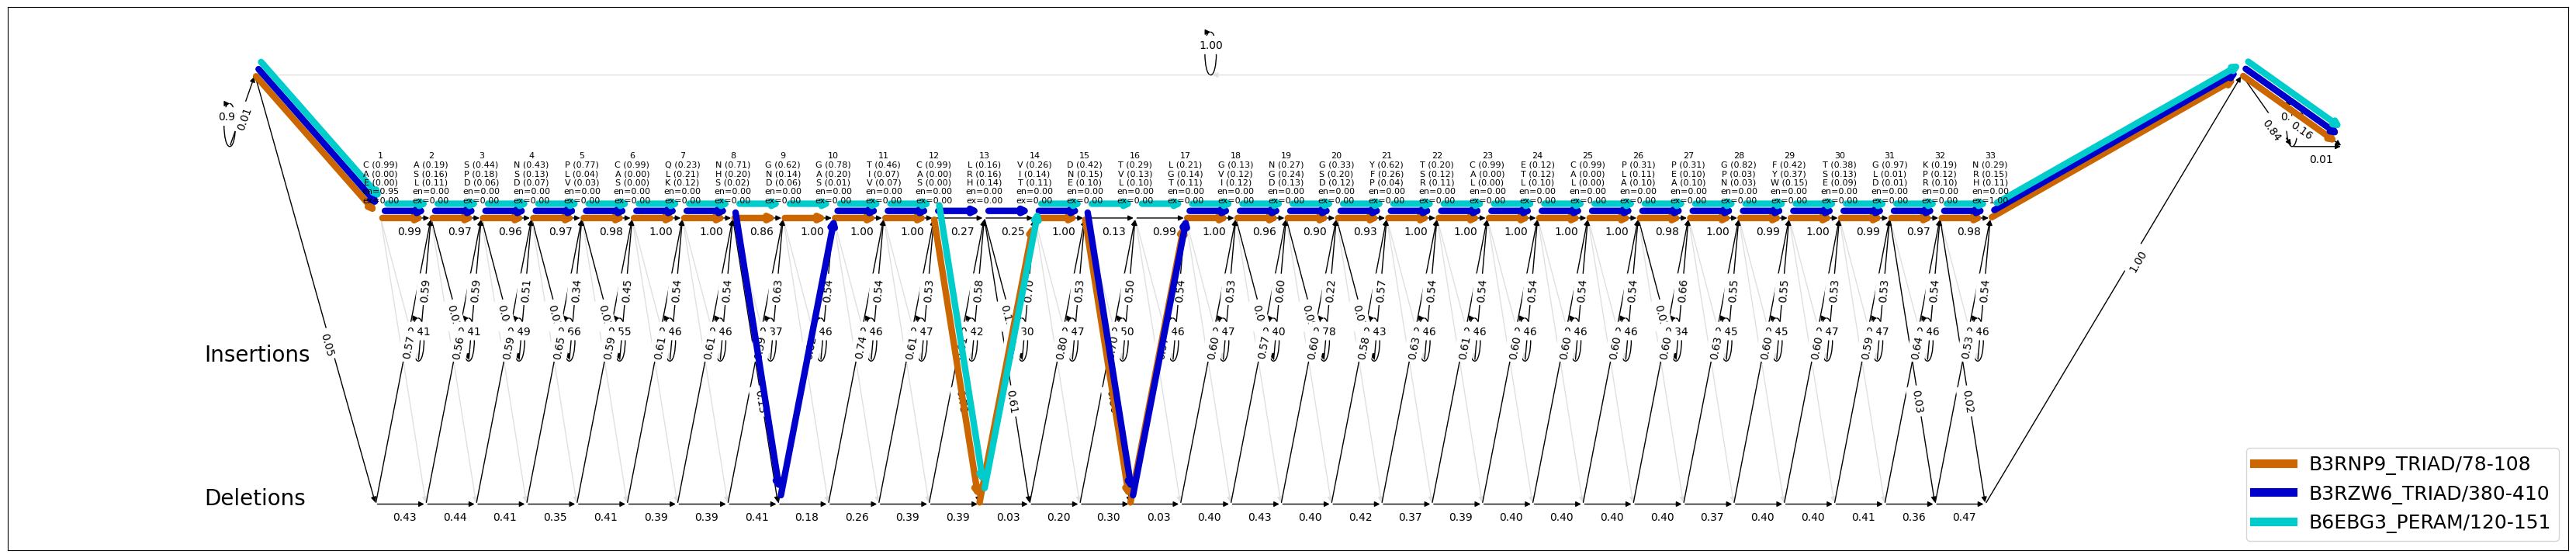

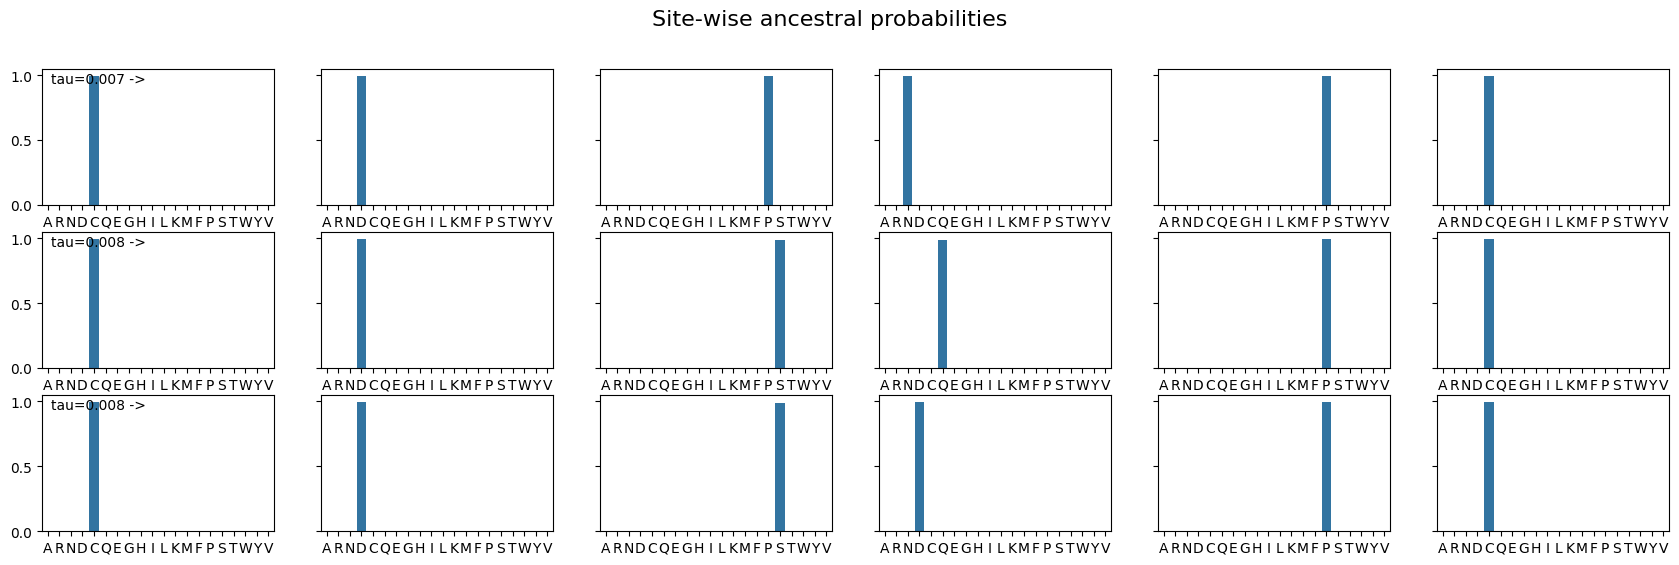

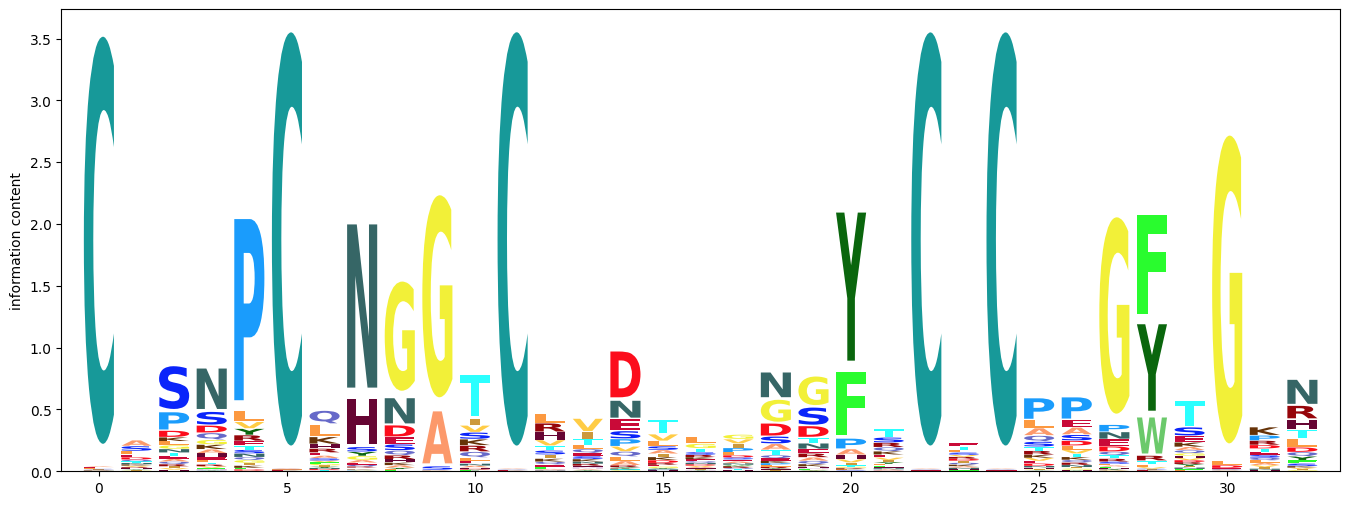

In [3]:
out_filename = "test/data/interactive.alignment.fasta"
config = Configuration.make_default(num_models)
with SequenceDataset(train_filename, fmt="fasta") as data:
    config["crop_long_seqs"] = int(np.ceil(2 * np.mean(data.seq_lens))) #comment out to disable cropping
    config["max_surgery_runs"] = 2
    alignment_model = Align.run_learnMSA(data,
                                        out_filename,
                                        config, 
                                        sequence_weights=Align.compute_sequence_weights(train_filename, "tmp") if use_weights else None,
                                        verbose=True,
                                        align_insertions=align_insertions)
    Visualize.print_and_plot(alignment_model, alignment_model.best_model)

In [4]:
!id_list=$(sed -n '/^>/p' {ref_filename} | sed 's/^.//') ; export MAX_N_PID_4_TCOFFEE=10000000 ; t_coffee -other_pg seq_reformat -in test/data/interactive.alignment.fasta -action +extract_seq_list ${{id_list[@]}} +rm_gap > test/data/interactive.projection.fasta

HERE: 1ixa
HERE: 1apo
HERE: 1urk
HERE: 1fsb
HERE: 1esl
HERE: 1hre
HERE: 1epi
HERE: 4tgf
HERE: 1hcgb
HERE: 1dan1
HERE: 1dan2
HERE: 1rfnb


In [5]:
!t_coffee -other_pg aln_compare -al1 {ref_filename} -al2 test/data/interactive.projection.fasta -compare_mode sp

*****************************************************
seq1       seq2          Sim   [ALL]           Tot  
egf           12         31.1    73.1 [100.0]   [ 5182]
